# Tổng quan chuỗi thời gian
# Cơ sở thống kê của dự báo

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sales = pd.read_csv("salesmonthly.csv")
sales.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


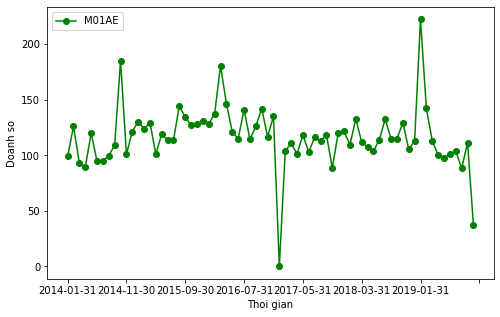

In [4]:
ax = sales.plot(x='datum', y='M01AE', color='green',style='-o', figsize = (8,5))
ax.set_xlabel("Thoi gian");
ax.set_ylabel("Doanh so");

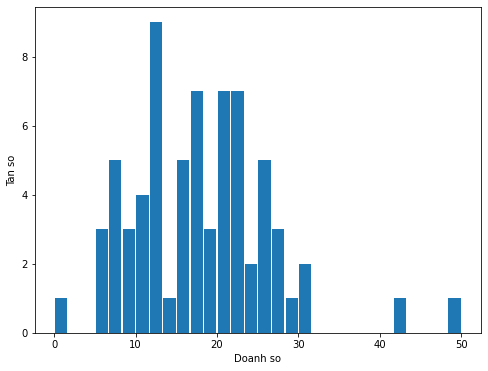

In [6]:
#bins: so khoang chia
#figsize: kích thước ảnh
ax = sales.N05C.hist(bins=30, rwidth=0.9, figsize = (8,6))
ax.set_xlabel("Doanh so")
ax.set_ylabel("Tan so")
ax.grid(False)
plt.show()

In [7]:
pip install pandas_datareader

     |████████████████████████████████| 109 kB 834 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install mplfinance

     |████████████████████████████████| 62 kB 531 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [9]:
import datetime as dt
import pandas_datareader as web
import mplfinance as fplt

In [16]:
start = dt.datetime(2021,3,10)
end = dt.datetime.now()
df = web.DataReader('FPT', 'yahoo', start, end)
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-09,75700.0,74500.0,75000.0,75000.0,218240.0,75000.0
2021-03-10,77500.0,75000.0,75900.0,76300.0,260240.0,76300.0
2021-03-11,77100.0,76100.0,76500.0,76700.0,147780.0,76700.0
2021-03-12,77100.0,76300.0,77000.0,76500.0,206280.0,76500.0
2021-03-15,77500.0,76100.0,76600.0,76500.0,176090.0,76500.0
...,...,...,...,...,...,...
2021-08-16,95200.0,94400.0,95000.0,94600.0,1906800.0,94600.0
2021-08-17,94600.0,94600.0,94600.0,94600.0,0.0,94600.0
2021-08-18,94900.0,93800.0,93800.0,94000.0,1951000.0,94000.0


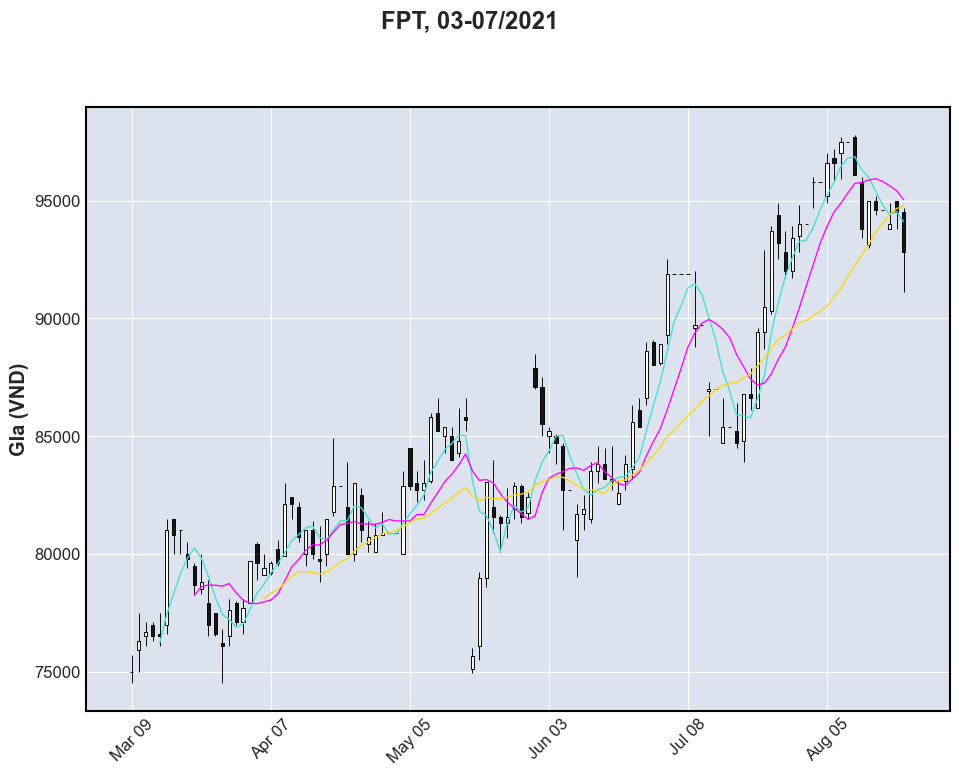

In [17]:
fplt.plot(df,
         type='candle',
         title='FPT, 03-07/2021',
        ylabel='GIa (VND)',
          figscale=1.5,
         mav = ( 5,10,20),
         
         )